In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as stats
import os
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
from matplotlib import gridspec
from scipy import stats

In [2]:
df=pd.read_table('FigS23.csv',sep='\t')
df.head()

,SeqID,Sample,Genomecoverage,Windowcoverage,NRAMP1copy,Haplotype
0,21228,F10-1-3,42.444019,85.159800,2.006403,AAGACATAA-TD
1,21228,F10-1-3,42.444019,73.339576,1.727913,AAGACATAA-TD
2,21228,F10-1-3,42.444019,67.280899,1.585168,AAGACATAA-TD
3,21228,F10-1-3,42.444019,70.963795,1.671939,AAGACATAA-TD
4,21228,F10-1-3,42.444019,77.144819,1.817566,AAGACATAA-TD


In [3]:
df['Color']=np.select([df['Haplotype'] == 'AAGACATAA-TD',
                       df['Haplotype'] == 'ATG-TD', 
                       df['Haplotype'] == 'CT-TD', 
                       df['Haplotype'] == 'ancestral'],
                       ['#F1BB7B','#5B1A18','#FD6467','#3573B9'])
df.head()

,SeqID,Sample,Genomecoverage,Windowcoverage,NRAMP1copy,Haplotype,Color
0,21228,F10-1-3,42.444019,85.159800,2.006403,AAGACATAA-TD,#F1BB7B
1,21228,F10-1-3,42.444019,73.339576,1.727913,AAGACATAA-TD,#F1BB7B
2,21228,F10-1-3,42.444019,67.280899,1.585168,AAGACATAA-TD,#F1BB7B
3,21228,F10-1-3,42.444019,70.963795,1.671939,AAGACATAA-TD,#F1BB7B
4,21228,F10-1-3,42.444019,77.144819,1.817566,AAGACATAA-TD,#F1BB7B


In [15]:
df_grouped=df.groupby('Sample').agg(SeqID=('SeqID','first'),
                                       NRAMP1copy=('NRAMP1copy','median'),
                                       Haplotype=('Haplotype','first'),
                                       STD=('NRAMP1copy','std')).reset_index()
df_grouped.head()

,Sample,SeqID,NRAMP1copy,Haplotype,STD
0,F1-201,3968_AS,3.473466,ATG-TD,0.392767
1,F1-203,3968_AT,3.354630,ATG-TD,0.419511
2,F1-3,13184,2.696935,ATG-TD,0.731302
3,F1-7,3541_AE,3.123581,ATG-TD,0.327229
4,F10-1-3,21228,1.857687,AAGACATAA-TD,0.180153


In [20]:
df_grouped['Color']=np.select([df_grouped['Haplotype'] == 'AAGACATAA-TD',
                       df_grouped['Haplotype'] == 'ATG-TD', 
                       df_grouped['Haplotype'] == 'CT-TD', 
                       df_grouped['Haplotype'] == 'ancestral'],
                       ['#F1BB7B','#5B1A18','#FD6467','#3573B9'])
df_grouped.head()

,Sample,SeqID,NRAMP1copy,Haplotype,STD,Color
0,F1-201,3968_AS,3.473466,ATG-TD,0.392767,#5B1A18
1,F1-203,3968_AT,3.354630,ATG-TD,0.419511,#5B1A18
2,F1-3,13184,2.696935,ATG-TD,0.731302,#5B1A18
3,F1-7,3541_AE,3.123581,ATG-TD,0.327229,#5B1A18
4,F10-1-3,21228,1.857687,AAGACATAA-TD,0.180153,#F1BB7B


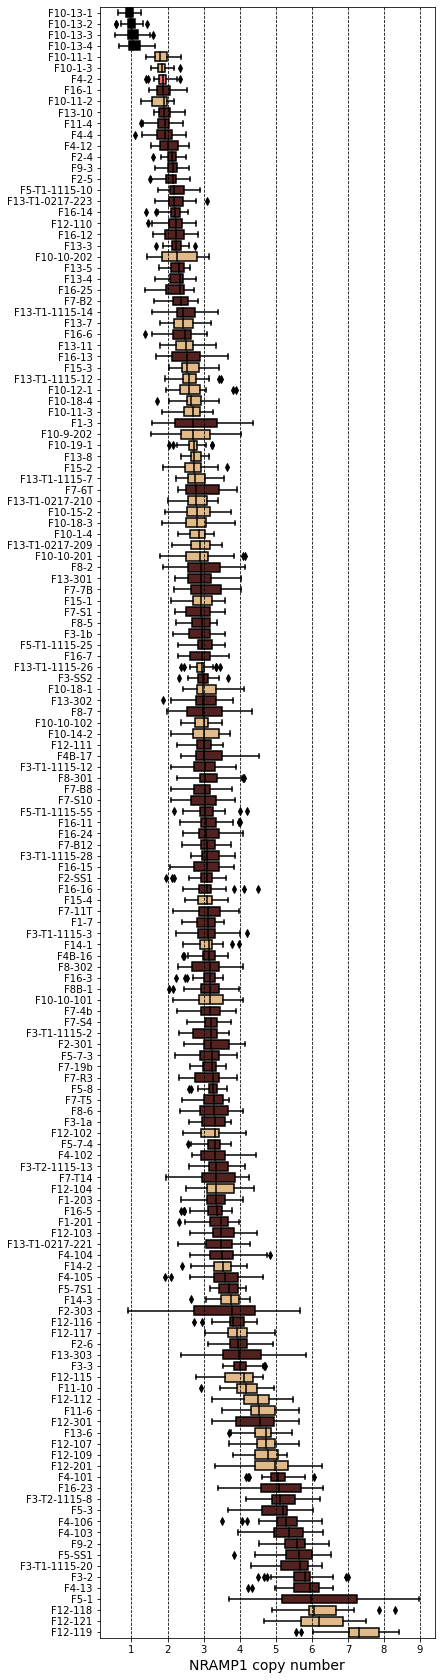

In [25]:
colorHap = df_grouped.sort_values('NRAMP1copy').agg('Color').to_list()
fig, ax=plt.subplots(1,1,figsize=(6,30))
Order= df.groupby('Sample').NRAMP1copy.median().sort_values()
sns.boxplot(data=df,
            x='NRAMP1copy',
            y='Sample',
            palette=colorHap,
            order=Order.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid(color='0',axis = 'x',linestyle='--')
plt.xlabel('NRAMP1 copy number',fontsize=14)
plt.ylabel('')
plt.savefig("FigS23.png", format="png",bbox_inches="tight",facecolor='w',dpi=400)